<a href="https://colab.research.google.com/github/GrzegorzSzczepanek/deep_learning_fun/blob/main/training_on_trigonometric_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
start = 0
end = 1000
step = 0.02

X = torch.arange(start, end, step)
y = np.sin(X)
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40000, 40000, 10000, 10000)

In [ ]:
start = 0
end = 1000
step = 0.02

X = torch.arange(start, end, step)
y = np.sin(X)
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40000, 40000, 10000, 10000)

In [ ]:
# Create TensorDataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Create DataLoader
batch_size = 32  # Adjust batch size as needed
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


print(len(train_dataloader.dataset))  # Number of training samples
print(len(test_dataloader.dataset))

40000
10000


In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(100, 7))
  plt.scatter(train_data, train_labels, c="b", s=0.04, label="training data")
  plt.scatter(test_data, test_labels, c="g", s=0.04, label="testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=0.04, label="predictions")

  plt.legend(prop={"size": 14})

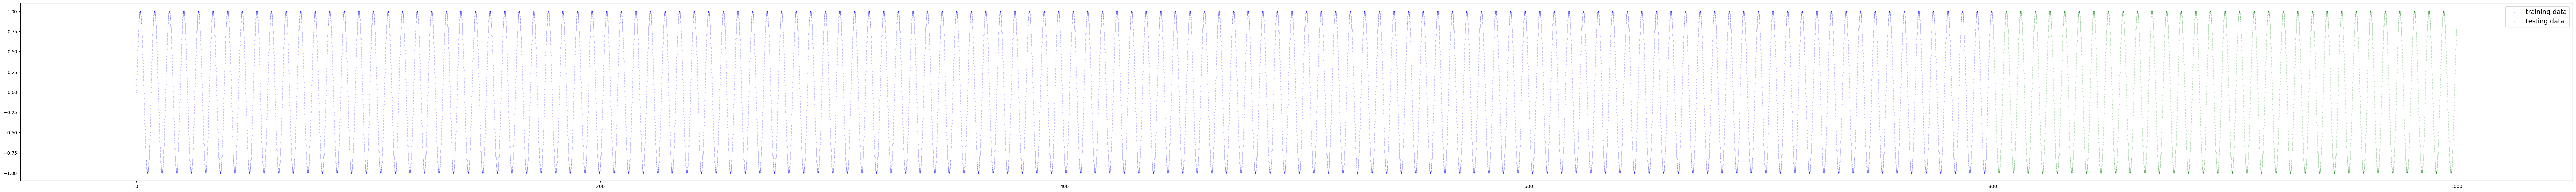

In [ ]:
plot_predictions()

In [546]:
class Sinus_Model(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_block1 = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU()
        )
        self.layer_block2 = nn.Sequential(
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
        )
        self.layer_block3 = nn.Sequential(
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU()
        )
        self.layer_block4 = nn.Sequential(
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.layer_block1(x)
        x = self.layer_block2(x)
        x = self.layer_block3(x)
        return self.layer_block4(x).squeeze(1)

# Instantiate the complex model with more hidden units and layers
model = Sinus_Model(1, 32, 1)
# model, model.state_dict()

In [547]:
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                             lr=0.1)

In [548]:
for batch_idx, (data, labels) in enumerate(train_dataloader):
    print(f"Batch {batch_idx} - Data shape: {data.shape}, Labels shape: {labels.shape}")
    print("Sample Data:", data)
    print("Sample Labels:", labels)
    break  # Stop after printing the first batch to avoid excessive output

Batch 0 - Data shape: torch.Size([32]), Labels shape: torch.Size([32])
Sample Data: tensor([306.3200, 515.8000, 493.2400, 195.2400, 431.7000, 750.0800, 160.2800,
        108.3000, 774.8000, 165.1200, 716.3800, 565.8400, 203.2400, 720.0000,
        134.0000, 519.0200,  26.7000, 556.0400, 386.7200,  16.1800, 145.9000,
        557.4000, 285.3000, 471.3200,  85.6200, 578.7400, 263.7200, 154.3200,
        289.2200, 598.6800, 230.2800, 318.4800])
Sample Labels: tensor([-0.9999,  0.5470, -0.0099,  0.4451, -0.9640,  0.6894, -0.0587,  0.9964,
         0.9221,  0.9827,  0.0967,  0.3460,  0.8212, -0.5441,  0.8859, -0.6109,
         1.0000,  0.0219, -0.2994, -0.4547,  0.9831, -0.9731,  0.5522,  0.0810,
        -0.7153,  0.6342, -0.1729, -0.3727,  0.1923,  0.9787, -0.8098, -0.9243])


In [549]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    model.train()
    train_loss, train_acc = 0, 0
    total_samples = 0
    for batch, (X, y) in enumerate(dataloader):
        # X, y = X.T, y.T
        y_pred = model(X.unsqueeze(1))

        loss = loss_fn(y_pred, y)
        train_loss += loss.item() * X.shape[0]
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_samples += X.shape[0]

        # Calculate MAE as accuracy metric
        train_acc += torch.abs(y_pred - y).sum().item()

    train_loss = train_loss / total_samples
    train_acc = train_acc / total_samples

    return train_loss, train_acc


In [550]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    model.eval()
    test_loss = 0
    total_samples = 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            # X, y = X.T, y.T
            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item() * X.shape[0]

            total_samples += X.shape[0]

    test_loss = test_loss / total_samples

    return test_loss


In [551]:
from tqdm.auto import tqdm
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int = 5):
    results = {"train_loss": [], "test_loss": []}
    for epoch in tqdm(range(epochs)):
        train_loss, _ = train_step(model=model,
                                   dataloader=train_dataloader,
                                   loss_fn=loss_fn,
                                   optimizer=optimizer)
        test_loss = test_step(model=model,
                              dataloader=test_dataloader,
                              loss_fn=loss_fn)

        results["train_loss"].append(train_loss)
        results["test_loss"].append(test_loss)

        print(f"Epoch: {epoch+1} | train_loss: {train_loss:.4f} | test_loss: {test_loss:.4f}")

    return results



In [552]:
from timeit import default_timer as timer

NUM_EPOCHS = 20
start_time = timer()

model_results = train(model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 2 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 3 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 4 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 5 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 6 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 7 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 8 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 9 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 10 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 11 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 12 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 13 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 14 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 15 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 16 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 17 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 18 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 19 | train_loss: 0.5002 | test_loss: 0.4978
Epoch: 20 | train_loss: 0.5002 | test_lo

In [534]:
7# 1. Set the model in evaluation mode
model.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  X_test = X_test.unsqueeze(1)
  y_preds = model(X_test)

plot_predictions(predictions=y_preds)

RuntimeError: ignored